In [1]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import itertools

### Load data: model predictions and true values

##### Randomly sampled

In [2]:
diversity_types = ["random_sampling"] + [f"{min_max}_{diversity_type}_diversity" for min_max in ["min","max"] for diversity_type in ["sequence","substitution_type", "mutation_distribution"]]

metrics = []
for diversity_type in diversity_types:
    df = pd.read_csv(f"model_predictions/Graphinity_predictions_test-varying_dataset_diversity-{diversity_type}.csv")

    # pearson's correlation
    pc = pearsonr(df["true_label"],df["pred_score"])[0]

    # distribution comparison - ratio of st devs
    sdr = df["pred_score"].std()/df["true_label"].std()
    if sdr > 1:
        sdr = df["true_label"].std()/df["pred_score"].std()

    if diversity_type == "random_sampling":
        metrics.append(["randomly_sampled", "NA", pc, sdr])
    else:
        metrics.append(["_".join(diversity_type.split("_")[1:-1]), diversity_type.split("_")[0], pc, sdr])

In [3]:
metrics_df = pd.DataFrame(metrics, columns=["Diversity","Min/Max","Pearson's Correlation","Standard Deviation Ratio"])

### Plot

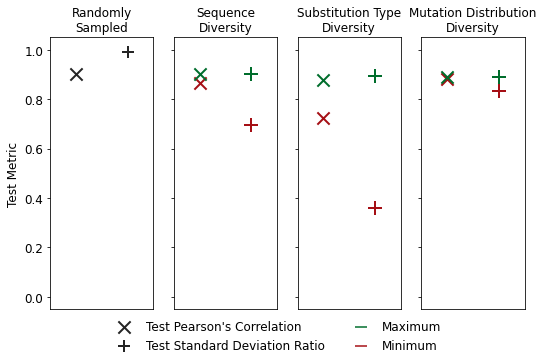

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(8.5, 5))

diversity_types = metrics_df.drop_duplicates(subset=["Diversity"])["Diversity"].to_list()
for i in range(len(diversity_types)):
    if i == 0:
        ax[i].set_title(diversity_types[i].replace("_","\n").title(), fontsize=12)
        ax[i].scatter([0.45], metrics_df[metrics_df["Diversity"] == "randomly_sampled"]["Pearson's Correlation"],
                      marker="x", s=150, linewidth=2, color="#252525",
                      label="Test Pearson's Correlation")
        ax[i].scatter([0.55], metrics_df[metrics_df["Diversity"] == "randomly_sampled"]["Standard Deviation Ratio"],
                      marker="+", s=150, linewidth=2, color="#252525",
                      label="Test Standard Deviation Ratio")
        ax[i].scatter([], [], color="#006d2c", label="Maximum", marker="_", s=150)
        ax[i].scatter([], [], color="#a50f15", label="Minimum", marker="_", s=150)

    else:
        ax[i].set_title(diversity_types[i].replace("_"," ").title() + "\nDiversity", fontsize=12)

        min_df = metrics_df[(metrics_df["Diversity"] == diversity_types[i]) & (metrics_df["Min/Max"] == "min")]
        max_df = metrics_df[(metrics_df["Diversity"] == diversity_types[i]) & (metrics_df["Min/Max"] == "max")]
        
        ax[i].scatter([0.45], min_df["Pearson's Correlation"], marker="x", s=150, linewidth=2,
                      color="#a50f15", label="Minimum – Test Pearson's Correlation")
        ax[i].scatter([0.45], max_df["Pearson's Correlation"], marker="x", s=150, linewidth=2,
                      color="#006d2c", label="Maximum – Test Pearson's Correlation")
        ax[i].scatter([0.55], min_df["Standard Deviation Ratio"],   marker="+", s=180, linewidth=2,
                      color="#a50f15", label="Minimum – Standard Deviation Ratio")
        ax[i].scatter([0.55], max_df["Standard Deviation Ratio"],   marker="+", s=180, linewidth=2,
                      color="#006d2c", label="Maximum – Standard Deviation Ratio")
        
        plt.setp(ax[i].get_yticklabels(), visible=False)
        
    ax[i].set_xticks([])
    ax[i].set_ylim(-0.05,1.05)
    ax[i].set_xlim(0.4,0.6)

ax[0].tick_params(axis="y", which="major", labelsize=12)

ax[0].set_ylim(-0.05,1.05)
ax[0].set_xlim(0.4,0.6)

ax[0].set_ylabel("Test Metric", fontsize=12)

ax[0].legend(frameon=False, bbox_to_anchor=(3.9, 0), ncol=2, fontsize=12)

plt.savefig("Figure-3b.png", dpi=300)